In [1]:
import kagglehub
navoneel_brain_mri_images_for_brain_tumor_detection_path = kagglehub.dataset_download('navoneel/brain-mri-images-for-brain-tumor-detection')

print('Data source import complete.')

Data source import complete.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [11]:
#DATA PREPROCESSING AND TRAINING
# Dataset path from kagglehub
path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
categories = ['yes', 'no']

# Read and process images
data = []
for category in categories:
    folder_path = os.path.join(path, category)
    label = categories.index(category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img_array = cv2.resize(img_array, (128, 128))  # Resize to 128x128
        data.append([img_array, label])
# Shuffle data to mix tumor and no-tumor images
np.random.shuffle(data)

# Separate features and labels
X, y = [], []
for features, label in data:
    X.append(features)
    y.append(label)

# Convert to numpy arrays and normalize pixel values
X = np.array(X).reshape(-1, 128, 128, 1) / 255.0
y = to_categorical(y)  # One-hot encode labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#BUILD CNN MODEL
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Two output classes (yes, no)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5588 - loss: 0.7429 - val_accuracy: 0.8431 - val_loss: 0.5337
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 787ms/step - accuracy: 0.7880 - loss: 0.5618 - val_accuracy: 0.8824 - val_loss: 0.3460
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 788ms/step - accuracy: 0.7405 - loss: 0.5330 - val_accuracy: 0.8431 - val_loss: 0.3624
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 933ms/step - accuracy: 0.7271 - loss: 0.5368 - val_accuracy: 0.8824 - val_loss: 0.3187
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 758ms/step - accuracy: 0.8082 - loss: 0.4702 - val_accuracy: 0.9020 - val_loss: 0.2845
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 798ms/step - accuracy: 0.8273 - loss: 0.4003 - val_accuracy: 0.7647 - val_loss: 0.4968
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 793ms/step - accuracy: 0.8202 - loss: 0.4216 - val_accuracy: 0.8824 - val_loss: 0.2807
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 743ms/step - accuracy: 0.8774 - loss: 0.2925 - val_accuracy: 0.8824 - val_loss

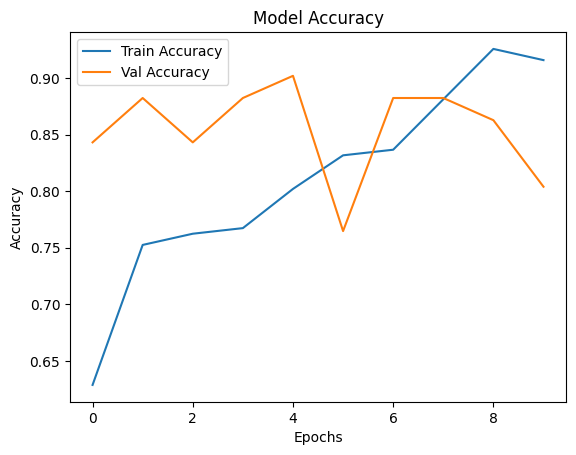

In [20]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step


Text(50.722222222222214, 0.5, 'True')

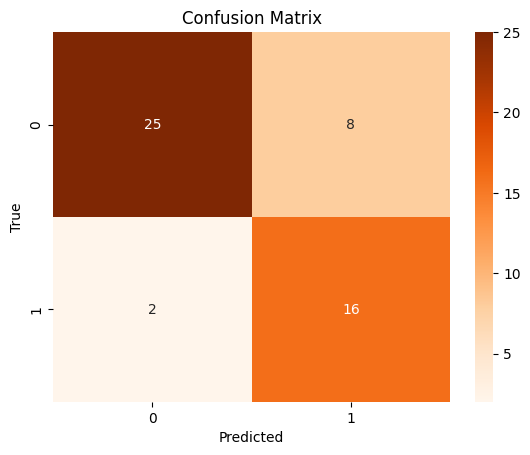

In [19]:
#EVALUATE MODEL
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")